In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Dhaka Rent.csv", sep=';')

In [3]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [5]:
x = df.drop('rent', axis=1)

In [6]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [7]:
x.shape

(60, 1)

In [8]:
y = df['rent'] #can be 1=D array it also would be 2-D 

In [10]:
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

# x = df[['area']] here x must be 2-D casue it's features and features could be multiple in real world data set

Text(0, 0.5, 'rent')

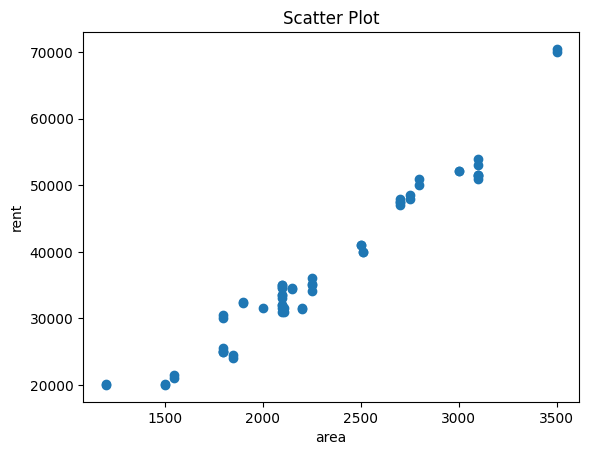

In [12]:
plt.scatter(x,y)
plt.title('Scatter Plot')
plt.xlabel('area')
plt.ylabel('rent')

In [13]:
x.mean()

area    2289.0
dtype: float64

In [14]:
y.mean()

37269.166666666664

# Data Split

In [15]:
from sklearn.model_selection import train_test_split

In [18]:
train, test = train_test_split(df, test_size=0.30, random_state=42) #size=.3 means 70% data in test and 30% in test

random_state is an optional parameter that provides a seed for the random number generator. This ensures reproducibility of the split if you want to obtain the same split in future runs.

In [19]:
train.shape

(42, 2)

In [20]:
test.shape

(18, 2)

In [21]:
train.head()

,area,rent
40,2150,34400
4,3000,52100
43,2510,40000
19,2700,47000
34,3000,52200


In [22]:
test.head()

,area,rent
0,2000,31500
5,1900,32500
36,1500,20200
45,3100,51000
13,2510,40050


# Seperate train and test for xtrain, ytrain, xtest, ytest

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=42)


In [29]:
xtrain.head()

,area
40,2150
4,3000
43,2510
19,2700
34,3000


In [27]:
xtrain.shape

(42, 1)

In [28]:
ytrain.head()

40    34400
4     52100
43    40000
19    47000
34    52200
Name: rent, dtype: int64

In [30]:
from sklearn.linear_model import LinearRegression

In [32]:
reg = LinearRegression()

In [33]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [34]:
reg.coef_   # y = mx+c here m is coeficient value

array([20.68636687])

In [35]:
reg.intercept_ # c is intercept value

-10252.90474033673

In [38]:
reg.predict([[2510]])

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41669.87610729])

In [39]:
residual =  40000 - 41669.87610729
residual

-1669.8761072900015

In [43]:
ytest

0     31500
5     32500
36    20200
45    51000
13    40050
54    51000
33    35100
48    25500
12    34500
57    25100
46    30000
50    31000
31    35010
3     36100
52    70500
17    21000
8     48000
6     20000
Name: rent, dtype: int64

In [44]:
pred = reg.predict(xtest)
pred

array([31119.82900279, 29051.19231563, 20776.64556701, 53874.83256151,
       41669.87610729, 47668.92250004, 36291.42072068, 26982.55562848,
       33188.46568994, 26982.55562848, 26982.55562848, 33395.32935866,
       33188.46568994, 36291.42072068, 62149.37931013, 21810.96391059,
       45600.28581288, 20776.64556701])

# Mean Square Error(MSE) and Mean Absolute Error(MAE)

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [47]:
mse = mean_squared_error(ytest, pred)
mse

7677066.248378809

In [50]:
from sklearn.metrics import mean_absolute_error

In [52]:
mae = mean_absolute_error(ytest, pred)
mae

2103.50832336242

# check performance

In [53]:
reg.score(xtest, ytest)

0.9515542918540623

# Best fit Line

Text(0, 0.5, 'rent')

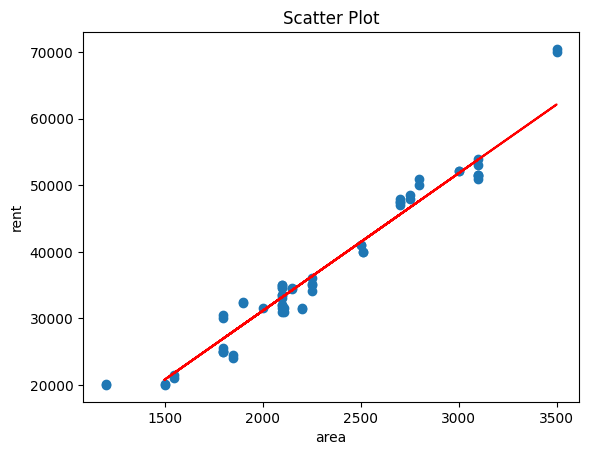

In [55]:
plt.plot(xtest, pred, color='red')
plt.scatter(x,y)
plt.title('Scatter Plot')
plt.xlabel('area')
plt.ylabel('rent')
